In [114]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
titanic_data = pd.read_csv('C:\\Users/andre/Downloads/titanic/train.csv')

In [68]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y = titanic_data.Survived

In [71]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [72]:
X = pd.get_dummies(X)

In [73]:
X = X.fillna({'Age': X.Age.median()})

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [75]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [76]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [77]:
clf.score(X_test,y_test)

0.8203389830508474

In [78]:
max_depth_values = range(1,100)

In [79]:
scores_data = pd.DataFrame()

In [80]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    mean_cross_val_score = cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [82]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score','test_score','cross_val_score'],
                          var_name='set_type', value_name='score')


In [83]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.768501
293,96,cross_val_score,0.763473
294,97,cross_val_score,0.768487
295,98,cross_val_score,0.773529


<AxesSubplot:xlabel='max_depth', ylabel='score'>

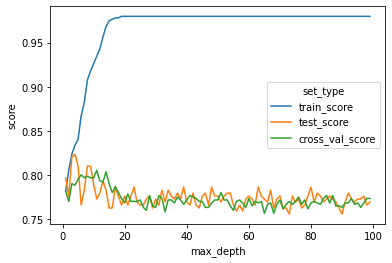

In [85]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

# Поиск лучших параметров

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [90]:
parametrs = {'criterion':['gini','entropy'],'max_depth':range(1,100)}

In [91]:
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv=5)

In [93]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [95]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [96]:
best_clf = grid_search_cv_clf.best_estimator_

In [98]:
best_clf.score(X_test,y_test)

0.8067796610169492

# Оценка качества precision, recall, F-мера

In [103]:
from sklearn.metrics import precision_score, recall_score

In [104]:
y_pred = best_clf.predict(X_test)

In [105]:
precision_score(y_test,y_pred)

0.7889908256880734

In [106]:
recall_score(y_test,y_pred)

0.7166666666666667

# Регулирование отношения к класам. Выставления значения определяния к классу

In [107]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [110]:
y_predicted_prob # вероятность поподания в каждый класс

array([[0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.49056604, 0.50943396],
       [0.5       , 0.5       ],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [0.49056604, 0.50943396],
       [0.        , 1.        ],
       [0.44      , 0.56      ],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.49056604, 0.50943396],
       [0.

<AxesSubplot:>

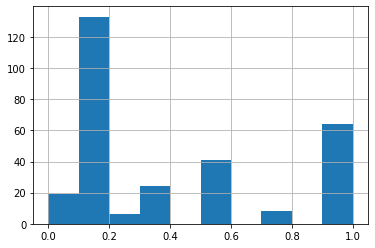

In [112]:
pd.Series(y_predicted_prob[:,1]).hist()

In [121]:
y_pred = np.where(y_predicted_prob[:,1]>0.2,1,0)

In [122]:
precision_score(y_test,y_pred)

0.7202797202797203

In [123]:
recall_score(y_test,y_pred)

0.8583333333333333

# ROC кривая

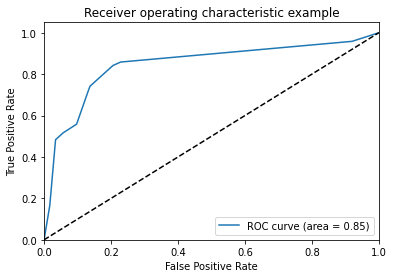

In [129]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# RandomForest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
clf_rf = RandomForestClassifier()

In [132]:
parametrs = {'n_estimators': [10,20,30],'max_depth':[2,5,7,10]}

In [133]:
grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv=5)

In [134]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [135]:
grid_search_cv_clf.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=30)

In [136]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [137]:
grid_search_cv_clf.best_score_

0.8238935574229691

In [138]:
grid_search_cv_clf.best_index_

5